# Data Agumentation Problem
#### Here you need to compare two models with and without agumentation to see the difference

### Import libraries

In [1]:
import glob
import cv2
import numpy as np
import random

### Read Images

In [2]:
# Unzip the pictures , run just once
!unzip data_aug-20221101T192103Z-001.zip

Archive:  data_aug-20221101T192103Z-001.zip
  inflating: data_aug/cat.7305.jpg   
  inflating: data_aug/dog.12247.jpg  
  inflating: data_aug/dog.306.jpg    
  inflating: data_aug/cat.4344.jpg   
  inflating: data_aug/cat.1807.jpg   
  inflating: data_aug/dog.11833.jpg  
  inflating: data_aug/cat.5077.jpg   
  inflating: data_aug/dog.10221.jpg  
  inflating: data_aug/dog.6503.jpg   
  inflating: data_aug/cat.5009.jpg   
  inflating: data_aug/cat.7738.jpg   
  inflating: data_aug/dog.9719.jpg   
  inflating: data_aug/dog.9374.jpg   
  inflating: data_aug/cat.10172.jpg  
  inflating: data_aug/cat.2482.jpg   
  inflating: data_aug/dog.42.jpg     
  inflating: data_aug/cat.1021.jpg   
  inflating: data_aug/dog.658.jpg    
  inflating: data_aug/dog.1989.jpg   
  inflating: data_aug/dog.6891.jpg   
  inflating: data_aug/dog.301.jpg    
  inflating: data_aug/cat.1666.jpg   
  inflating: data_aug/dog.4439.jpg   
  inflating: data_aug/cat.6706.jpg   
  inflating: data_aug/cat.11843.jpg  
  infl

In [51]:
# First we should read all the images from the provided directory,
# 1. first unzip the .zip file attached with homeworks
# 2. read images from directory
# 3. create labels array



########################
## PUT YOUR CODE HERE ##
########################
import os
import cv2

datadir = "data_aug"
number_of_pics = len(os.listdir(datadir))

def get_dataset():
  dataset = np.zeros((100,28,28,3))
  labels = []

  i = 0 

  for img in os.listdir(datadir) :
    
    c = img.split('.')[0]
    
    if c == 'cat' :
      labels.append(0)
    if c == 'dog' :
      labels.append(1)

    im = cv2.imread(os.path.join(datadir , img))
    im_resized = cv2.resize(im , (28,28))
    dataset[i] = im_resized
    i +=1

  return dataset ,np.array(labels)

In [55]:
dataset, labels = get_dataset()

### Prepare Dataset

In [57]:
# Normalize your dataset in a way to have a image dataset with pixles in range (0 to 1)

########################
## PUT YOUR CODE HERE ##
########################
for image in dataset : 
  image /= 255

In [17]:
# Resize your images to (28 * 28)


########################
## PUT YOUR CODE HERE ##
########################
# The images has been resized in previous parts

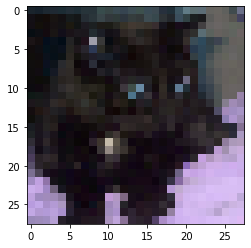

In [58]:
import matplotlib.pyplot as plt
plt.imshow(dataset[2])

In [59]:
a = np.array(dataset)
a.shape

(100, 28, 28, 3)

In [72]:
# Flatten your dataset images 


########################
## PUT YOUR CODE HERE ##
########################
dataset_flatten = np.reshape(dataset , (100,28*28*3))

In [73]:
# Check your dataset and labels to be a numpy ndarray of sizes (800, 28 * 28 * 3) and (800, 1) respectively.


########################
## PUT YOUR CODE HERE ##
########################
assert labels.shape == (100,)
assert dataset_flatten.shape == (100 , 28*28*3)

### Create your Model

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Input, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [94]:
# create a simple model of Keras MLP with desired number of dense layers and units and activation function
# don't forget to shuffle the data
# this is a binary classification problem



########################
## PUT YOUR CODE HERE ##
########################
model = Sequential()
model.add(Input(shape=(28*28*3)))
model.add(Flatten())

# Hidden Layer
# Write your code here
model.add(Dense(units=50))
model.add(Activation('relu'))

model.add(Dense(units=50))
model.add(Activation('relu'))

model.add(Dense(units=20))
model.add(Activation('relu'))

# Output Layer
# Write your code here
model.add(Dense(units=1))
model.add(Activation('sigmoid'))

In [154]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 2352)              0         
                                                                 
 dense_21 (Dense)            (None, 50)                117650    
                                                                 
 activation_21 (Activation)  (None, 50)                0         
                                                                 
 dense_22 (Dense)            (None, 50)                2550      
                                                                 
 activation_22 (Activation)  (None, 50)                0         
                                                                 
 dense_23 (Dense)            (None, 20)                1020      
                                                                 
 activation_23 (Activation)  (None, 20)               

In [86]:
# Split your dataset to test and train with your desired implementation
# use sklearn.model_selection.train_test_split


########################
## PUT YOUR CODE HERE ##
########################
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.33)

In [95]:
# Compile with your desired optimizer and loss function with 'accuracy' as metric
# # Don't forget to monitor the overfitting, you should take care of val_accuracy and val_loss

########################
## PUT YOUR CODE HERE ##
#
# uncomment below and complete the code
# history = 
########################

adam_optimizer = Adam(learning_rate=0.01 ,beta_1=0.9,beta_2=0.999,name="Adam")
model.compile(
    optimizer = adam_optimizer, 
    loss = BinaryCrossentropy(from_logits=True),
    metrics = 'accuracy'
)

history = model.fit(
   x_train, 
   y_train, 
   batch_size = 64, 
   epochs = 200,
   verbose="auto",
   validation_data = (x_test, y_test)
  #  validation_split = 0.2
)


Epoch 1/200
2/2 [==============================] - 1s 173ms/step - loss: 0.7768 - accuracy: 0.4179 - val_loss: 2.1155 - val_accuracy: 0.5152
Epoch 2/200
2/2 [==============================] - 0s 26ms/step - loss: 1.9316 - accuracy: 0.4925 - val_loss: 2.3249 - val_accuracy: 0.4848
Epoch 3/200
2/2 [==============================] - 0s 36ms/step - loss: 2.0614 - accuracy: 0.5224 - val_loss: 1.6968 - val_accuracy: 0.5152
Epoch 4/200
2/2 [==============================] - 0s 27ms/step - loss: 1.6526 - accuracy: 0.4925 - val_loss: 0.8289 - val_accuracy: 0.4848
Epoch 5/200
2/2 [==============================] - 0s 27ms/step - loss: 0.8080 - accuracy: 0.5075 - val_loss: 0.9639 - val_accuracy: 0.4848
Epoch 6/200
2/2 [==============================] - 0s 27ms/step - loss: 0.8154 - accuracy: 0.5522 - val_loss: 1.8470 - val_accuracy: 0.5152
Epoch 7/200
2/2 [==============================] - 0s 30ms/step - loss: 1.8393 - accuracy: 0.4925 - val_loss: 1.7155 - val_accuracy: 0.5152
Epoch 8/200
2/2 [==

### Plot results

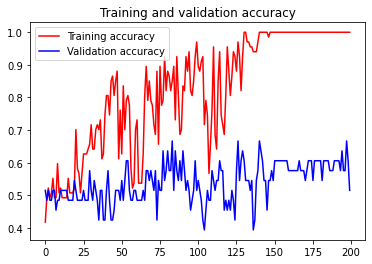

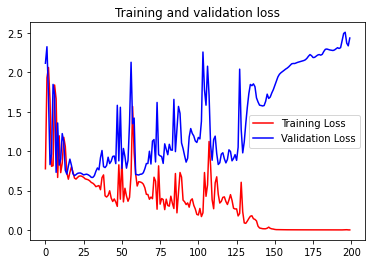

In [96]:
# Plot your data

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Evaluate results

In [ ]:
# Evaluate your model on the test data


########################
## PUT YOUR CODE HERE ##
########################


# Compare results with and without using agumentation
### Now we need to do agumentation to create more images to help us overcome underfitting

### Agumentation Methods
Here you should do the agumentation methods to produce more images


In [97]:
# In this cell you need to implement agumentation methods to increase our data
# NOTICE! Only use libraries in CV2 or others, DON'T use KERAS and Pytorch!


def fill(img, h, w):
    ''' 
    we use this function to resize the shifted image and fill border pixles with different methods
    
    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
          h: an integer defining the height of target image
          w: an integer defining the width of target image
    
    output: resized and interpolated image 

    '''
        
    img = cv2.resize(img, (h, w), cv2.INTER_CUBIC)
    return img


def horizontal_shift(img, ratio=0.5):

    ''' 
    we use this function to shift the image horizontally with the given ratio
    width_target = width_input - ratio * width_input
    
    Hint: select ratio in range (-ratio to ratio) uniformly, to simulate horizontally shift to right and left with different ratios


    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
          ratio: a float number between 0 and 1
    
    output: resized and interpolated image 

    '''
    
    if ratio > 1 or ratio < 0:
        print('Value should be less than 1 and greater than 0')
        return img
    ratio = random.uniform(-ratio, ratio) # you can change this
    h, w = img.shape[:2]
    to_shift = w*ratio
    if ratio > 0:
        img = img[:, :int(w-to_shift), :]
    if ratio < 0:
        img = img[:, int(-1*to_shift):, :]

    img = fill(img, h, w) # fill image borders

    return img


In [98]:
    
def vertical_shift(img, ratio=0.5):

    ''' 
    we use this function to shift the image vertically with the given ratio
    width_target = width_input - ratio * width_input
    
    Hint: select ratio in range (-ratio to ratio) uniformly, to simulate vertically shift to up and down with different ratios


    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
          ratio: a float number between 0 and 1
    
    output: resized and interpolated image 

    '''

    if ratio > 1 or ratio < 0:
        print('Value should be less than 1 and greater than 0')
        return img
    ratio = random.uniform(-ratio, ratio)
    h, w = img.shape[:2]
    to_shift = h*ratio
    if ratio > 0:
        img = img[:int(h-to_shift), :, :]
    if ratio < 0:
        img = img[int(-1*to_shift):, :, :]
        
    img = fill(img, h, w)

    return img



In [99]:
def brightness(img, low, high):

    ''' 
    we use this function to change the brightness of the image with given high and low values
    
    Hint: first convert to HSV color domain, Next make your image brighter or darker then convert back to BGR

    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
          low:
          high:
    
    output: image with different brightness

    '''

    value = random.uniform(low, high)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv = np.array(hsv, dtype = np.float64)
    hsv[:,:,1] = hsv[:,:,1]*value
    hsv[:,:,1][hsv[:,:,1]>255]  = 255
    hsv[:,:,2] = hsv[:,:,2]*value 
    hsv[:,:,2][hsv[:,:,2]>255]  = 255
    hsv = np.array(hsv, dtype = np.uint8)
    img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    
    return img

In [100]:

def zoom(img, value):

    ''' 
    we use this function to zoom the image with given value
    
    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
          value: an integer number indicating the zoom effect
    
    output: zoomed image

    '''
    
    if value > 1 or value < 0:
        print('Value for zoom should be less than 1 and greater than 0')
        return img
    value = random.uniform(value, 1)
    h, w = img.shape[:2]
    h_taken = int(value*h)
    w_taken = int(value*w)
    h_start = random.randint(0, h-h_taken)
    w_start = random.randint(0, w-w_taken)
    img = img[h_start:h_start+h_taken, w_start:w_start+w_taken, :]
    
    img = fill(img, h, w)

    return img

In [101]:
def channel_shift(img, value):

    ''' 
    we use this function to shift color channels to play with colors in the image
    
    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
          value: an integer number indicating the color change effect
    
    output: image with changed colors
    
    '''
    
    value = int(random.uniform(-value, value))
    img = img + value
    img[:,:,:][img[:,:,:]>255]  = 255
    img[:,:,:][img[:,:,:]<0]  = 0
    img = img.astype(np.uint8)
    
    return img

In [102]:
def horizontal_flip(img):

    ''' 
    we use this function to flip the image horizontally

    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
    
    output: horizontally fliped image

    '''

    return cv2.flip(img, 1)


In [103]:
def vertical_flip(img):

    ''' 
    we use this function to flip the image vertically
    
    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
    
    output: vertically fliped image

    '''
    
    return cv2.flip(img, 0)


### Prepare your dataset

In [134]:
def apply_augmentation(img , dataset, starting_index, label, labels):

  # Apply augmentations
  filled_image = fill(img , 28,28)

  shifted_img = horizontal_shift(img, ratio=0.5)

  shifted_img_vertically = vertical_shift(img, ratio=0.5)

  brightenned_img = brightness(img, 0.5, 2.5)

  zoomed_img = zoom(img , .5)

  shifted_channel = channel_shift(img, 50)

  h_flipped = horizontal_flip(img)

  v_flipped = vertical_flip(img)

  # Add to dataset
  i = starting_index
  dataset[i] = shifted_img
  dataset[i+1] = shifted_img_vertically
  dataset[i+2] = brightenned_img
  dataset[i+3] = zoomed_img
  dataset[i+4] = shifted_channel
  dataset[i+5] = h_flipped
  dataset[i+6] = v_flipped
  dataset[i+7] = filled_image

  for j in range(8):
    labels.append(label)

def get_dataset():
  dataset = np.zeros((900,28,28,3))
  labels = []
  label = 0

  i = 0 

  for img in os.listdir(datadir) :
    
    c = img.split('.')[0]
    label = ""
    
    if c == 'cat' :
      labels.append(0)
      label = 0

    if c == 'dog' :
      labels.append(1)
      label = 1

    # Read image and resize it
    im = cv2.imread(os.path.join(datadir , img))
    im_resized = cv2.resize(im , (28,28))

    dataset[i] = im_resized
    
    # Apply augmentation methods and add them to dataset
    apply_augmentation(im_resized , dataset , i+1, label, labels)
    i += 9

  return dataset ,np.array(labels)

In [135]:
# For each image in our dataset run the previous methods and create a new dataset

########################
## PUT YOUR CODE HERE ##
########################
dataset , labels = get_dataset()

In [ ]:
# Extend your labels array new size with correct labels maped to each agumented image

########################
## PUT YOUR CODE HERE ##
########################


In [136]:
# Normalize your dataset in a way to have a image dataset with pixles in range (0 to 1)

########################
## PUT YOUR CODE HERE ##
########################
for image in dataset : 
  image /= 255

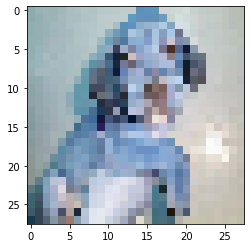

In [140]:
plt.imshow(dataset[8])

In [ ]:
# Resize your images to (28 * 28)


########################
## PUT YOUR CODE HERE ##
########################

In [146]:
# Flatten your dataset images 


########################
## PUT YOUR CODE HERE ##
########################
dataset_flatten = np.reshape(dataset , (900,28*28*3))

In [149]:
# Check your dataset and labels to be a numpy ndarray of sizes (800, 28 * 28 * 3) and (800, 1) respectively.


########################
## PUT YOUR CODE HERE ##
########################
assert labels.shape == (900,)
assert dataset_flatten.shape == (900 , 28*28*3)

### Create your model

In [141]:
# create a simple model of Keras MLP with desired number of dense layers and units and activation function
# don't forget to shuffle the data
# this is a binary classification problem



########################
## PUT YOUR CODE HERE ##
########################
model = Sequential()
model.add(Input(shape=(28*28*3)))
model.add(Flatten())

# Hidden Layer
# Write your code here
model.add(Dense(units=50))
model.add(Activation('relu'))

model.add(Dense(units=50))
model.add(Activation('relu'))

model.add(Dense(units=20))
model.add(Activation('relu'))

# Output Layer
# Write your code here
model.add(Dense(units=1))
model.add(Activation('sigmoid'))

In [151]:
# Split your dataset to test and train with the desired implementation
# use sklearn.model_selection.train_test_split


########################
## PUT YOUR CODE HERE ##
########################
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(dataset_flatten, labels, test_size=0.33)

In [152]:
# Compile your model to introduce loss function optimizer and metrices to monitor accuracy metric and train on the data
# Don't forget to monitor the overfitting, you should take care of val_accuracy and val_loss

########################
## PUT YOUR CODE HERE ##
#
# uncomment below and complete the code
# history = 
########################

adam_optimizer = Adam(learning_rate=0.01 ,beta_1=0.9,beta_2=0.999,name="Adam")
model.compile(
    optimizer = adam_optimizer, 
    loss = BinaryCrossentropy(from_logits=True),
    metrics = 'accuracy'
)

history = model.fit(
   x_train, 
   y_train, 
   batch_size = 64, 
   epochs = 200,
   verbose="auto",
   validation_data = (x_test, y_test)
  #  validation_split = 0.2
)


Epoch 1/200


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


10/10 [==============================] - 1s 26ms/step - loss: 1.4039 - accuracy: 0.4925 - val_loss: 0.7119 - val_accuracy: 0.4579
Epoch 2/200
10/10 [==============================] - 0s 8ms/step - loss: 0.7750 - accuracy: 0.5008 - val_loss: 1.0777 - val_accuracy: 0.4579
Epoch 3/200
10/10 [==============================] - 0s 8ms/step - loss: 0.8141 - accuracy: 0.4710 - val_loss: 0.6585 - val_accuracy: 0.5926
Epoch 4/200
10/10 [==============================] - 0s 9ms/step - loss: 0.7184 - accuracy: 0.5439 - val_loss: 0.6725 - val_accuracy: 0.5522
Epoch 5/200
10/10 [==============================] - 0s 8ms/step - loss: 0.6744 - accuracy: 0.5721 - val_loss: 0.6450 - val_accuracy: 0.6195
Epoch 6/200
10/10 [==============================] - 0s 11ms/step - loss: 0.6222 - accuracy: 0.6551 - val_loss: 0.7375 - val_accuracy: 0.4916
Epoch 7/200
10/10 [==============================] - 0s 9ms/step - loss: 0.6278 - accuracy: 0.6451 - val_loss: 1.0355 - val_accuracy: 0.4646
Epoch 8/200
10/10 [====

### Plot your results

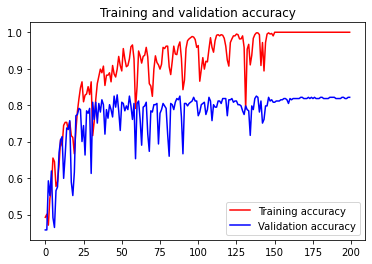

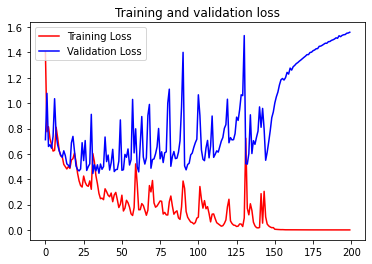

In [153]:
# Plot your data

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Evaluate results

In [ ]:
# Evaluate your model on the test data


########################
## PUT YOUR CODE HERE ##
########################


# Compare your results with and without using agumentation to see the difference

## Optional Bonus Activity

In [ ]:
# Optional

# Keras data Augmentation

#use the bellow links

# https://keras.io/guides/keras_cv/custom_image_augmentations/

# https://keras.io/api/preprocessing/image/